In [2]:
import pandas as pd
print('done')
#we are importing pandas with the short cut 'pd' for easy reference

done


In [2]:
##pwd

#print working directory: this aided me in finding the path on my computer

In [3]:
data = pd.read_csv('/Users/monikaspreitzer/Desktop/Data Analyst Course/Course 1/C1T1/Demographic_Data.csv')
#this is requesting panda pull in the CSV from the following location and giving it the short cut 'data'
print('done')

done


In [4]:
df = pd.read_csv('/Users/monikaspreitzer/Desktop/Data Analyst Course/Course 1/C1T3/items & avg amt.csv')

In [5]:
data[['in-store','age','items','amount','region']]
#this is requesting that the data is presented 
#-- I wonder if there is an easy was to pull in all columns (done by * in SQL)

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [5]:
data.head()
#head pulls in the first x rows. The deafult is 5 but you can insert any number within the ()
#Helpful respurce -- https://www.w3resource.com/pandas/dataframe/dataframe-head.php#:~:text=DataFrame%20%2D%20head()%20function,type%20of%20data%20in%20it.

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [6]:
data.tail()

,in-store,age,items,amount,region
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1
79999,1,30,1,527.12,3


In [7]:
data.describe()
#describe will give you info on count, mean, std, min, max, etc. 
#Count -- this would help you know if data is missing.
#mean -- the average. in this example you can see the average age, average items bought, average amount spent
#std -- Standard Deviation (SD) is measured as the spread of data distribution in the given data set.
#Min -- in this example you can see the yougest buyer, the lowest amount spent and smalles number of items purchased.
#max -- in this example you can see the oldest buyer, the most amount spent and the most items purchased. 


,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [8]:
data.info()
#check the data types of each variable 
#Expectation: 
	#in-store - Int 
	#age - Int 
	#items  - Int 
	#amount   - Float 
	#region   - Int


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [118]:
data.amount.sum()

66848505.79050001

In [9]:
#pre-processing steps:
	#Data cleaning -- cleaned some data in excel
	#Data transformation
	#How to deal with missing values? -- no missing data
	#Data reduction -- unsure if we should just focus on in-store vs. online
	#Data discretization
	#Text cleaning (if needed)

In [10]:
data = data.drop_duplicates()
#Data cleaning 

In [11]:
print(data.isnull().sum())
#look for missing values

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [12]:
data.dtypes
#verify datatypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [13]:
import matplotlib.pyplot as plt
#import matplotlib library as plt

In [14]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


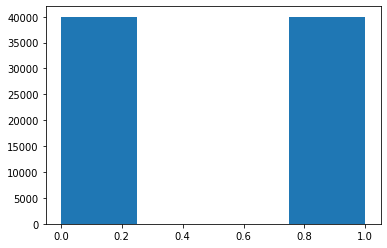

In [15]:
plt.hist(data['in-store'], bins=4) 
plt.show()
#code breakdown: 
    #plt = shortcut for matplotlib
    #hist = histogram 
    #data = shortcut for raw data set
    #show - will display the current figure that you are working on.
    #show vs. draw -- https://stackoverflow.com/questions/23141452/difference-between-plt-draw-and-plt-show-in-matplotlib

In [16]:
# Number of transactions in each region
data.groupby('region')['region'].count()

#1    15,997 ** Least transactions in Region 1 (North) 
#3    18,000
#2    19,991
#4    25,988 ** Most transactions in Region 4 (West) 

region
1    15997
2    19994
3    18000
4    25988
Name: region, dtype: int64

(array([39989.,     0.,     0., 39990.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <a list of 4 Patch objects>)

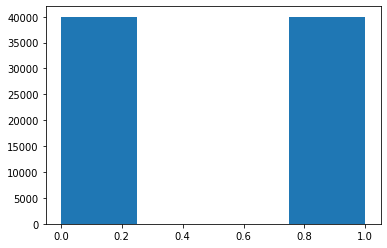

In [17]:
plt.hist(data['in-store'], bins=4) 
#Bin ==  how many values fall into each interval
#to figure out Bin amount -- (Max - Min) / The number of intervals you want = bin
#Example = max(30) - Min(10) = 20 / 5 intervals = 4 


(array([22446., 29715., 19846.,  7972.]),
 array([18.  , 34.75, 51.5 , 68.25, 85.  ]),
 <a list of 4 Patch objects>)

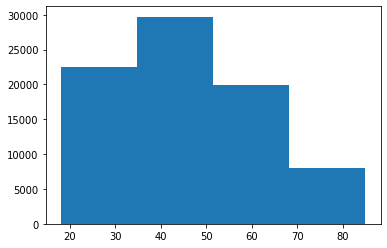

In [18]:
plt.hist(data['age'],bins=4) 
#max - 80
#min - 18

In [19]:
# Number of transactions in each region
data.groupby('items')['items'].count()

#1     5,699 ** Least items purchased
#8     5,788
#5    11,231
#2    11,284
#7    11,375
#3    11,486
#6    11,519
#4    11,594 ** Most items purchased

items
1     5699
2    11284
3    11486
4    11594
5    11233
6    11519
7    11376
8     5788
Name: items, dtype: int64

(array([16983., 23080., 22752., 17164.]),
 array([1.  , 2.75, 4.5 , 6.25, 8.  ]),
 <a list of 4 Patch objects>)

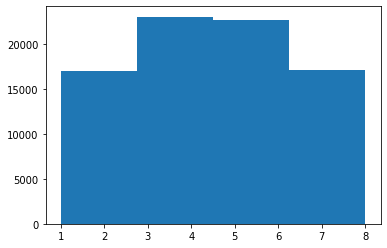

In [20]:
plt.hist(data['items'], bins=4) 

(array([46593., 18038., 10315.,  5033.]),
 array([   5.0047  ,  753.753525, 1502.50235 , 2251.251175, 3000.      ]),
 <a list of 4 Patch objects>)

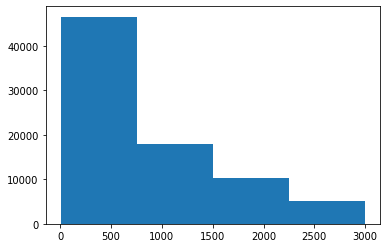

In [21]:
plt.hist(data['amount'], bins=4) 

(array([15997., 19994., 18000., 25988.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <a list of 4 Patch objects>)

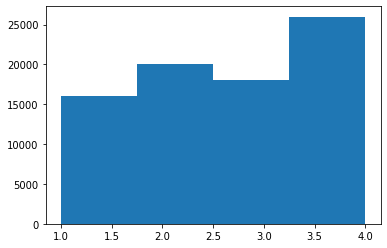

In [22]:
plt.hist(data['region'], bins=4) 

In [23]:
import numpy as np

In [24]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

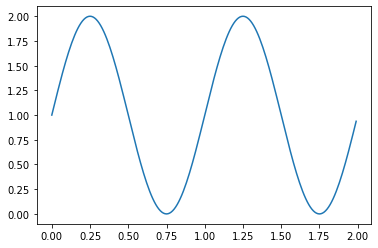

In [25]:
fig, ax = plt.subplots()
ax.plot(t, s)
plt.show()

In [26]:
data_sample = data.sample(100)

In [27]:
x = data_sample['age']
y = data_sample['amount']

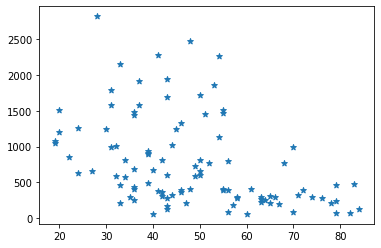

In [28]:
plt.scatter(x,y, marker='*')
plt.show()

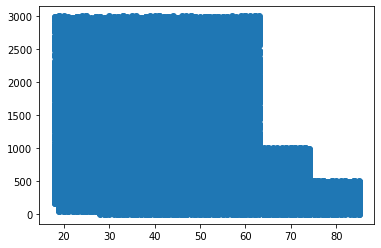

In [29]:
x = data['age']
y = data['amount']
plt.scatter(x,y, marker='o')
plt.show()

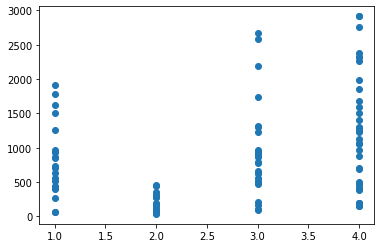

In [30]:
data_sample = data.sample(100)
x = data_sample['region']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.show()

In [31]:
data.groupby('region')['amount'].mean()

region
1     744.990939
2     252.097741
3     917.969637
4    1283.938357
Name: amount, dtype: float64

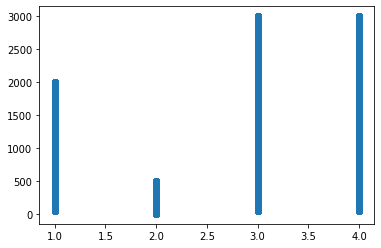

In [32]:

x = data['region']
y = data['amount']
plt.scatter(x,y, marker='o')
plt.show()

In [33]:
data.groupby('items')['amount'].mean()

items
1    825.401751
2    846.956834
3    836.594085
4    829.619594
5    833.973730
6    835.332638
7    830.026801
8    851.268593
Name: amount, dtype: float64



my_data = '1', '2', '3', '4', '5', '6', '7', '8'
my_labels = 'amount','items'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Items vs. Amount')
plt.axis('equal')
plt.show()

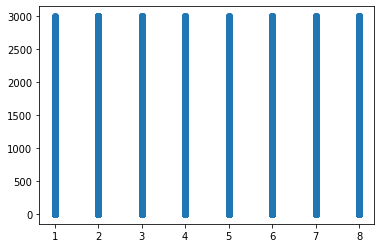

In [34]:

x = data['items']
y = data['amount']
plt.scatter(x,y, marker='o')
plt.show()

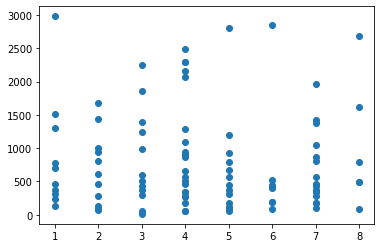

In [35]:
data_sample = data.sample(100)
x = data_sample['items']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.show()

In [36]:
data.groupby('in-store')['items'].mean()

in-store
0    4.513166
1    4.497099
Name: items, dtype: float64

In [37]:
data.groupby('in-store')['amount'].mean()

in-store
0    897.546576
1    774.106421
Name: amount, dtype: float64

In [38]:
data.groupby('in-store')['region'].mean()

in-store
0    2.824952
1    2.524881
Name: region, dtype: float64

In [39]:
data.groupby('in-store')['age'].mean()

in-store
0    48.558654
1    42.958440
Name: age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd18240700>,
      dtype=object)

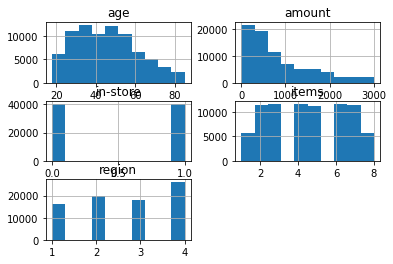

In [40]:
data.hist()

In [41]:
data.groupby('in-store')['in-store'].count()

in-store
0    39989
1    39990
Name: in-store, dtype: int64

In [42]:
data.groupby('region')['amount'].mean()

region
1     744.990939
2     252.097741
3     917.969637
4    1283.938357
Name: amount, dtype: float64

In [43]:
data.groupby('region')['items'].mean()

region
1    4.510283
2    4.512804
3    4.494000
4    4.503771
Name: items, dtype: float64

In [44]:
data.groupby('region')['in-store'].mean()

region
1    1.000000
2    0.000000
3    0.611056
4    0.500000
Name: in-store, dtype: float64

In [45]:
data.groupby('in-store')['items'].mean()

in-store
0    4.513166
1    4.497099
Name: items, dtype: float64

In [46]:
import numpy as np

def avg_positive_speed(speed):
    s = np.array(speed)
    positives = s > 0
    if positives.any():
        return s[positives].mean()
    else:
        return 0.

In [47]:
import numpy as np
avg_amt_region = np.average('items', 'items'==('region' == 1))

IndexError: tuple index out of range

In [ ]:
help('print')

In [14]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [59]:
data.groupby('items')['amount'].mean()

items
1    825.401751
2    846.956834
3    836.594085
4    829.619594
5    833.973730
6    835.332638
7    830.026801
8    851.268593
Name: amount, dtype: float64

In [56]:
#bin amount
amount_labels = ['1','2','3','4','5','6']
cut_bins = [0, 500, 1000, 1500, 2000, 2500, 3000]
data['amt_range'] = pd.cut(data['amount'], bins=cut_bins, labels=amount_labels)

In [57]:
index = data.items

In [72]:
index = df.items
print(index)

<bound method DataFrame.items of    items     avg_amt
0      1  825.401751
1      2  846.956834
2      3  836.594085
3      4  829.619594
4      5  833.973730
5      6  835.332638
6      7  830.026801
7      8  851.268593>


Text(0.5, 0, 'Number of Items')

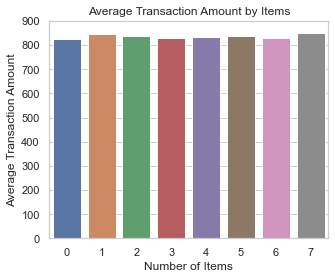

In [89]:
sns.set(style="whitegrid", color_codes=True)

# Set the width and height of the figure
plt.figure(figsize=(5,4))

# Add title
plt.title("Average Transaction Amount by Items")

# Bar chart showing average cost of number of items purchased
sns.barplot(x=df.index, y=df.avg_amt)
ax.set_xticklabels(df['items'], rotation='vertical', fontsize=10)



# Add label for vertical axis
plt.ylabel("Average Transaction Amount")
axes = plt.gca()
axes.set_ylim([0,900])
#look for limit in plt




Text(0.5, 0, 'Number of Items Purchased')

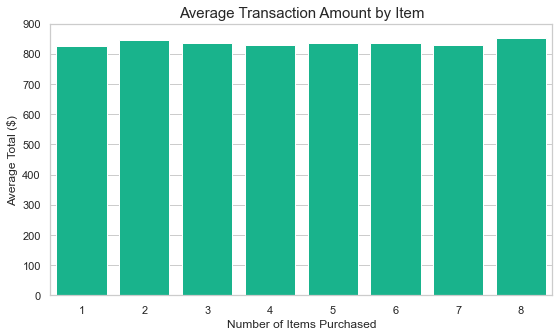

In [142]:
# Set the width and height of the figure
plt.figure(figsize=(9,5))

# Add titl with size
plt.title("Average Transaction Amount by Item",fontsize=15)
#axes.set_title("Average Total By Items Purchased")#,fontsize=20) #("Average Cost Based on Number of Items Purchased",fontsize=20) #()

#adjust y-axis limit
axes = plt.gca()
axes.set_ylim([0,900])


#code to create graph (https://www.youtube.com/watch?v=Pkvdc2Z6eBg)
#x = x axis variable
#y = y axis vairable
#data = where the data is located
#ci = confidence interval
#color = color of graph *you can also input a color hex code
ax = sns.barplot(x = 'items', y = 'amount', data = data, ci = None, color = '#00CC99')

#adjust x & y axis labels
plt.ylabel("Average Total ($)")
plt.xlabel("Number of Items Purchased")


In [ ]:
ax = sns.barplot(x = 'items', y = 'amount', data = data, ci = None)

In [6]:
data.groupby('region')['amount'].sum()

region
1    1.192258e+07
2    5.042184e+06
3    1.652345e+07
4    3.338535e+07
Name: amount, dtype: float64

In [16]:
#line graph for age 
ax = sns.lineplot(x = count('age'), y ='age', data = data)


NameError: name 'count' is not defined